In [1]:
import pandas as pd
import joblib
import numpy as np
import torch
import torch.optim as optim
import warnings 
warnings.simplefilter('ignore')
from torch.nn import Linear,ReLU,Sigmoid
from utils import *
torch.cuda.is_available()

True

In [2]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')

tag['TAG'] = [str(i).replace('TI','TJ') for i in tag['TAG'].values]

temp = tag[tag['TAG']=='MLPAP_TJC-0757A.PV'].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

tag_map = dict(zip(tag['TAG'],tag['chinese']))
tag_map

{'MLPAP_TJC-0627.PV': 'OX預熱器出口溫度',
 'MLPAP_TRC-0610.PV': '空氣預熱器出口溫度',
 'MLPAP_FR-0632.PV': '汽機風量',
 'MLPAP_FQ-0619.PV': 'OX入料量',
 'MLPAP_TJC-0757A.PV': '反應槽鹽浴溫度',
 'MLPAP_PIC-0741.PV': '汽鼓(V211)鍋爐水壓力',
 'MLPAP_LIC-0738.PV': '汽鼓(V211)鍋爐水液位',
 'MLPAP_PIC-0761.PV': '鹽浴冷卻器(E112)出口壓力',
 'MLPAP_TRC-0762.PV': '鹽浴冷卻器(E112)入口溫度',
 'MLPAP_LRC-0729.PV': '鍋爐水液位控制',
 'MLPAP_TJC-1721.PV': '轉換式冷凝器冷油溫度',
 'MLPAP_TRC-1734.PV': '轉換式冷凝器熱油溫度',
 'MLPAP_TJR-0721.PV': '反應槽出口溫度',
 'MLPAP_TJ-0706A01': '反應槽觸媒溫度(CL1)_高度(1900)',
 'MLPAP_TJ-0706A02': '反應槽觸媒溫度_高度(1010)',
 'MLPAP_TJ-0706B01': '反應槽觸媒溫度_高度(2865)',
 'MLPAP_TJ-0706C01': '反應槽觸媒溫度_高度(400)',
 'MLPAP_TJ-0706D01': '反應槽觸媒溫度_高度(2230)',
 'MLPAP_TJ-0706E01': '反應槽觸媒溫度(CL1)_高度(1310)',
 'MLPAP_TJ-0716A01': '反應槽觸媒溫度(CL1)_高度(1160)',
 'MLPAP_TJ-0716B01': '反應槽觸媒溫度_高度(700)',
 'MLPAP_TJ-0716C01': '反應槽觸媒溫度_高度(2715)',
 'MLPAP_TJ-0716D01': '反應槽觸媒溫度_高度(1650)',
 'MLPAP_TJ-0716D02': '反應槽觸媒溫度(CL2)_高度(2380)',
 'MLPAP_TJ-0716E01': '反應槽觸媒溫度(CL0)_高度(550)',
 'MLPAP_FQI-0997.PV': '粗P

In [3]:
critic = joblib.load('./model/net.pkl')
critic = critic.eval()
mm_x = joblib.load('./model/mm_x.pkl')
mm_y = joblib.load('./model/mm_y.pkl')

# def columns

In [4]:
x_cols = [
          'MLPAP_FR-0632.PV',
          'MLPAP_LIC-0738.PV',
          'MLPAP_LRC-0729.PV',
          'MLPAP_PIC-0761.PV',
          'MLPAP_TJ-0757B.PV',
          'MLPAP_TJC-0627.PV',
          'MLPAP_TJC-0757.PV',
          'MLPAP_TJC-0757A.PV',
          'MLPAP_TJC-1721.PV',
          'MLPAP_TRC-0610.PV',
          'MLPAP_TRC-0747.PV',
          'MLPAP_TRC-0762.PV',
          'MLPAP_TRC-1734.PV']
x_cols = sorted(x_cols)
x_cols.insert(0,'MLPAP_FQ-0619.PV')
x_cols

['MLPAP_FQ-0619.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_LIC-0738.PV',
 'MLPAP_LRC-0729.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TJC-0757.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TRC-1734.PV']

In [5]:
y_cols = ['MLPAP_FQI-0997.PV']

# critic forward test

In [6]:
x = np.random.normal(loc=0,scale=1,size=(39,14))
x = pd.DataFrame(x,columns=x_cols)
x.head()

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,-0.440798,0.858021,-0.335232,-0.975372,-0.227325,0.524162,-0.920306,0.443841,0.913678,0.903991,0.942503,-0.632808,-0.914531,0.291991
1,-1.384605,0.491543,-1.418497,-1.599889,-0.720689,0.729235,-1.071219,-1.326161,1.436705,0.862842,0.625662,-0.279224,0.942260,-0.573320
2,-0.239918,-0.795852,2.080881,-0.943641,-0.368870,1.553682,-0.825789,-0.054405,1.916582,-1.957510,-1.620606,1.249383,1.388590,-0.401453
3,-1.265740,1.454882,0.547015,-0.477048,-0.565109,1.246388,-0.029832,1.179714,-1.441265,0.400830,-0.435015,0.662870,0.510932,1.767324
4,-0.261370,-0.516099,-1.326800,2.248370,-3.292336,-0.263370,-0.179470,1.036476,-1.007186,0.619026,0.461945,-0.375117,-1.052302,2.205712


In [7]:
y = critic(torch.tensor(x.values.reshape(-1,39*14)).cuda())
print(y)
y = mm_y.inverse_transform(y.detach().cpu().numpy())
y

tensor([[0.4754]], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward>)


array([[7379.98238147]])

# build generator

In [8]:
def build_generator(input_shape,output_shape):
    net = torch.nn.Sequential(
        Linear(input_shape,256),
        ReLU(),
        Linear(256,output_shape),
        Sigmoid()
    )
    return net

In [9]:
def init_weights(m):
  if hasattr(m,'weight'):
    torch.nn.init.xavier_uniform(m.weight)
  if hasattr(m,'bias'):  
    m.bias.data.fill_(0)

In [10]:
net = build_generator(1,39*14).double().cuda()
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=546, bias=True)
  (3): Sigmoid()
)

# noise_iter

In [11]:
noise = torch.tensor(np.random.normal(loc=0,scale=1,size=(5000,1))).cuda()
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

# obj function

In [12]:
obj_function = lambda x:critic(x).mean()

# optimizer

In [13]:
optimizer = optim.Adam(net.parameters(),lr=1e-4)

# train

In [14]:
def train(net,noise_iter,obj_function,optimizer,num_epochs=100):
    train_history = []
    for epoch in range(num_epochs):
        train_avg_loss = 0
        t = 0
        for noise in noise_iter:
            noise = noise[0]
            z = net(noise).cuda()
            loss = obj_function(z)
            loss *= -1
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_avg_loss += loss.item()
            t += 1
        train_avg_loss /= t
        print("epochs {} loss {:.4f}".format(epoch,train_avg_loss))
        train_history.append(train_avg_loss)
    # plt train loss
    plt.plot(np.array(train_history))
    plt.title('train loss')
    # return trained net
    return net

epochs 0 loss -0.4319
epochs 1 loss -0.5119
epochs 2 loss -0.6066
epochs 3 loss -0.7013
epochs 4 loss -0.7826
epochs 5 loss -0.8458
epochs 6 loss -0.8915
epochs 7 loss -0.9230
epochs 8 loss -0.9440
epochs 9 loss -0.9581
epochs 10 loss -0.9677
epochs 11 loss -0.9745
epochs 12 loss -0.9794
epochs 13 loss -0.9830
epochs 14 loss -0.9857
epochs 15 loss -0.9878
epochs 16 loss -0.9895
epochs 17 loss -0.9908
epochs 18 loss -0.9919
epochs 19 loss -0.9928
epochs 20 loss -0.9936
epochs 21 loss -0.9943
epochs 22 loss -0.9948
epochs 23 loss -0.9953
epochs 24 loss -0.9957
epochs 25 loss -0.9960
epochs 26 loss -0.9964
epochs 27 loss -0.9966
epochs 28 loss -0.9969
epochs 29 loss -0.9971


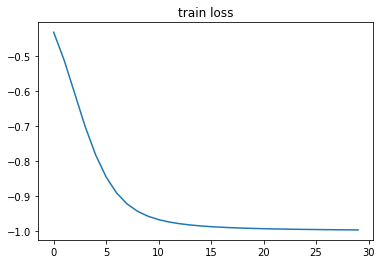

In [15]:
net = train(net,noise_iter,obj_function,optimizer,num_epochs=30)

# result

In [16]:
output = critic(net(noise)).detach().cpu().numpy()
output = mm_y.inverse_transform(output)
output = pd.DataFrame(output,columns=['0997'])
output

,0997
0,9972.857904
1,9995.291638
2,9998.814947
3,9981.299733
4,9998.242234
...,...
4995,9973.930170
4996,9974.045369
4997,9998.722943
4998,9974.208948


In [17]:
best_idx = np.argmax(output.values)
output.loc[[best_idx]]

,0997
4169,9998.891599


In [18]:
result = pd.DataFrame(net(noise).detach().cpu().numpy())
result[:] = mm_x.inverse_transform(result)
r1 = result.iloc[best_idx,:].values.reshape(39,14)
r1 = pd.DataFrame(r1,columns=x_cols)
r1.loc['median'] = r1.median(axis=0)
r1

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,7692.109571,84.602189,25.476919,33.148375,48.852798,346.373052,143.370349,2.615824,360.087691,66.818754,190.264856,164.407322,349.871182,162.912591
1,7702.637309,65.700768,51.444913,56.709876,49.651869,361.087984,156.803564,2.671725,360.218936,66.437188,165.087502,164.149540,350.618984,162.209474
2,7696.397178,84.758856,51.634586,56.271412,49.629419,361.089334,143.589187,-2.047361,359.909827,55.530708,165.621311,179.428779,363.636044,198.197947
3,7708.952962,65.020555,53.094052,57.263962,49.675112,361.051701,156.805169,-1.868864,359.883985,55.600560,190.009774,179.627320,350.316890,163.968660
4,7730.395817,65.442628,35.788908,31.733437,49.642159,346.711717,143.830327,2.407484,360.224086,56.411985,165.597957,164.935339,362.317224,162.104589
5,7684.007629,85.082299,52.634359,56.688010,48.824948,360.561141,143.350825,-1.788975,346.925467,55.982116,190.058206,164.280919,350.100979,195.091535
6,7554.116022,85.365686,35.220660,31.780099,48.828853,347.310255,157.482528,2.395578,360.242223,66.846832,189.227304,164.357994,363.334141,196.436172
7,7765.274428,85.321171,35.297924,56.383797,49.687416,346.810156,143.843481,-1.637591,360.062395,56.434194,165.586238,179.214431,350.705620,163.273648
8,7647.338383,66.098414,36.559981,31.703666,49.681643,346.446458,157.214980,2.630163,359.771171,55.832723,190.108698,164.597346,363.830131,162.314800
9,7756.907532,84.911772,52.740639,57.065013,49.620590,346.612759,157.016896,2.664845,359.707309,67.088994,189.332968,164.863129,350.487880,195.397114


In [19]:
r1 = r1.loc[['median']].T
r1['chinese'] = r1.index.map(tag_map)
r1 = r1[['chinese','median']]

In [20]:
print('best control factor maybe:')
r1

best control factor maybe:


,chinese,median
MLPAP_FQ-0619.PV,OX入料量,7692.109571
MLPAP_FR-0632.PV,汽機風量,84.911772
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,35.953352
MLPAP_LRC-0729.PV,鍋爐水液位控制,33.667746
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,49.629419
MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,360.561141
MLPAP_TJC-0627.PV,OX預熱器出口溫度,143.843481
MLPAP_TJC-0757.PV,反應器A/B側鹽浴溫度差,2.407484
MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,347.229083
MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,56.128530
